# 1. Import all the necessary libraries



In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import plotly.express as px
import emoji
import string
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 2. Import dataset from Kaggle

In [61]:
df1 = pd.read_csv('/Users/tativalentine/Documents/Capstone/cyberbullying_tweets.csv')

In [62]:
#Let's review the first 20 columns of our data in the dataset 
df1.head(20)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [63]:
# Pull out some data information (number of columns, data type and etc.)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [66]:
# Check on for missing values
df1.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

#### The provided data has no Null values!



In [67]:
# Next, let's show the count of unique values in the "cyberbullying_type" column
df1['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

The "cyberbullying_type" column of the dataset contains 6 unique values. The most frequent type of cyberbullying in the dataset is "religion", which occurs in 7998 instances. The second most frequent type is "age", which occurs in 7992 instances, followed by "gender" with 7973 instances. The least frequent type of cyberbullying in the dataset is "other_cyberbullying", which occurs in 7823 instances.

 This information provides an insight into the distribution of cyberbullying types in the dataset and can be helpful to understand the problem and design an appropriate ML model.


In [68]:
#Next step is to add encoded column for sentiment analysis
df1["cyberbullying_type_encoded"] = df1['cyberbullying_type'].replace({"religion": 1, "age": 2, "ethnicity": 3, "gender": 4, "other_cyberbullying": 5,"not_cyberbullying": 6})

In [69]:
df1.head()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6


In [70]:
# Define a function to preprocess the text data
def preprocess_text(tweet_text):
    # Remove URLs from the text
    tweet_text = re.sub(r"http\S+", "", tweet_text)
    
    # Remove punctuations and convert text to lowercase
    tweet_text= tweet_text.translate(str.maketrans("", "", string.punctuation)).lower()
    
    # Tokenize the text into words
    words = tweet_text.split()
    
    # Remove stop words from the text
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    
    # Stem the words using Snowball stemmer
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a string
    tweet_text = " ".join(words)
    
    return tweet_text

# Apply the preprocess_text function to the text column of the DataFrame
df1["tweet_text"] = df1["tweet_text"].apply(preprocess_text)

In [71]:
#Remove emoji from the tweet_text
def strip_emoji(tweet_text):
    return emoji.replace_emoji(tweet_text,replace="")

In [72]:
#Remove contractions from the tweet_text
def decontract(tweet_text):
    tweet_text = re.sub(r"can\'t", "can not", tweet_text)
    tweet_text = re.sub(r"n\'t", " not", tweet_text)
    tweet_text = re.sub(r"\'re", " are", tweet_text)
    tweet_text = re.sub(r"\'s", " is", tweet_text)
    tweet_text = re.sub(r"\'d", " would", tweet_text)
    tweet_text = re.sub(r"\'ll", " will", tweet_text)
    tweet_text = re.sub(r"\'t", " not", tweet_text)
    tweet_text = re.sub(r"\'ve", " have", tweet_text)
    tweet_text = re.sub(r"\'m", " am", tweet_text)
    return tweet_text

In [73]:
df1

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,word katandandr food crapilici mkr,not_cyberbullying,6
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,6
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,6
3,jasongio meh p thank head concern anoth angri ...,not_cyberbullying,6
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,6
...,...,...,...
47687,black ppl arent expect anyth depend anyth yet ...,ethnicity,3
47688,turner withhold disappoint turner call court “...,ethnicity,3
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,3
47690,yea fuck rt therealexel your nigger fuck unfol...,ethnicity,3


In [74]:
# Remove hashtags and special characters from the text
def clean_hashtags(tweet):
    pattern1 = r'#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)'
    pattern2 = r'#|_'
    words1 = re.split(pattern1, tweet)
    words2 = [re.split(pattern2, word) for word in words1]
    words3 = [word for sublist in words2 for word in sublist]
    new_tweet = ' '.join(words3)
    
    return new_tweet


In [76]:
def filter_chars(a):
    # Split the input string into a list of words
    words = a.split()

    # Use list comprehension to filter out words that contain '$' or '&'
    filtered_words = [word for word in words if '$' not in word and '&' not in word]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text


In [81]:
df1['cleaned_text'] = df1['tweet_text'].apply(filter_chars)
df1.head()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded,cleaned_text
0,word katandandr food crapilici mkr,not_cyberbullying,6,word katandandr food crapilici mkr
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,6,xochitlsuckkk classi whore red velvet cupcak
3,jasongio meh p thank head concern anoth angri ...,not_cyberbullying,6,jasongio meh p thank head concern anoth angri ...
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,6,rudhoeenglish isi account pretend kurdish acco...


We've created a new column called "cleaned_text". The values in this new column are generated by applying a function named "filter_chars" to the values in an existing column named "tweet_text". 

### Cleaning dublicates

In [83]:
# Find duplicates based on the "cleaned_text" column
duplicates = df1[df1.duplicated("cleaned_text")]

# Print the number of duplicates found
print("Number of duplicates:", len(duplicates))

# Drop duplicates based on the "cleaned_text" column
df1.drop_duplicates("cleaned_text", inplace=True)

# Print the updated DataFrame without duplicates
print(df1)


Number of duplicates: 2237
                                              tweet_text cyberbullying_type  \
0                     word katandandr food crapilici mkr  not_cyberbullying   
1      aussietv white mkr theblock imacelebrityau tod...  not_cyberbullying   
2           xochitlsuckkk classi whore red velvet cupcak  not_cyberbullying   
3      jasongio meh p thank head concern anoth angri ...  not_cyberbullying   
4      rudhoeenglish isi account pretend kurdish acco...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl arent expect anyth depend anyth yet ...          ethnicity   
47688  turner withhold disappoint turner call court “...          ethnicity   
47689  swear god dumb nigger bitch got bleach hair re...          ethnicity   
47690  yea fuck rt therealexel your nigger fuck unfol...          ethnicity   
47691  bro u gotta chill rt chillshrammi dog fuck kp ...          ethnicity   

       cyberbullying_typ

In [84]:

# Download necessary resources 
nltk.download('punkt')
nltk.download('wordnet')

# Find duplicates based on the "cleaned_text" column
duplicates = df1[df1.duplicated("cleaned_text")]

# Print the number of duplicates found
print("Number of duplicates:", len(duplicates))

# Drop duplicates based on the "cleaned_text" column
df1.drop_duplicates("cleaned_text", inplace=True)

# Tokenization
df1["tokens"] = df1["cleaned_text"].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
df1["lemmas"] = df1["tokens"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Stemming
stemmer = PorterStemmer()
df1["stems"] = df1["tokens"].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Print the updated DataFrame with tokens, lemmas, and stems
print(df1)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tativalentine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tativalentine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of duplicates: 0
                                              tweet_text cyberbullying_type  \
0                     word katandandr food crapilici mkr  not_cyberbullying   
1      aussietv white mkr theblock imacelebrityau tod...  not_cyberbullying   
2           xochitlsuckkk classi whore red velvet cupcak  not_cyberbullying   
3      jasongio meh p thank head concern anoth angri ...  not_cyberbullying   
4      rudhoeenglish isi account pretend kurdish acco...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl arent expect anyth depend anyth yet ...          ethnicity   
47688  turner withhold disappoint turner call court “...          ethnicity   
47689  swear god dumb nigger bitch got bleach hair re...          ethnicity   
47690  yea fuck rt therealexel your nigger fuck unfol...          ethnicity   
47691  bro u gotta chill rt chillshrammi dog fuck kp ...          ethnicity   

       cyberbullying_type_e

In this code, we first find and drop duplicates based on the "cleaned_text" column. 
Then, we perform tokenization, which creates a new column "tokens" containing a list of tokens for each text in the df1. Next, we use WordNetLemmatizer to perform lemmatization, creating a new column "lemmas" containing a list of lemmas for each text in the df1. 
Finally, we use PorterStemmer to perform stemming, creating a new column "stems" containing a list of stems for each text in the df1.

In [86]:
# Create a list to store the lengths of each tweet
tweet_lengths = []

# Loop through each tweet in the DataFrame
for tweet in df1['tweet_text']:
    
    # Calculate the length of the tweet and append it to the list
    tweet_len = len(tweet)
    tweet_lengths.append(tweet_len)
    
# Create a new column in the DataFrame with the tweet lengths
df1['text_len'] = tweet_lengths


In [94]:
df1.head()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded,cleaned_text,tokens,lemmas,stems,text_len
0,word katandandr food crapilici mkr,not_cyberbullying,6,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]","[word, katandandr, food, crapilici, mkr]","[word, katandandr, food, crapilici, mkr]",34
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...","[aussietv, white, mkr, theblock, imacelebritya...","[aussietv, white, mkr, theblock, imacelebritya...",92
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,6,xochitlsuckkk classi whore red velvet cupcak,"[xochitlsuckkk, classi, whore, red, velvet, cu...","[xochitlsuckkk, classi, whore, red, velvet, cu...","[xochitlsuckkk, classi, whore, red, velvet, cu...",44
3,jasongio meh p thank head concern anoth angri ...,not_cyberbullying,6,jasongio meh p thank head concern anoth angri ...,"[jasongio, meh, p, thank, head, concern, anoth...","[jasongio, meh, p, thank, head, concern, anoth...","[jasongio, meh, p, thank, head, concern, anoth...",58
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,6,rudhoeenglish isi account pretend kurdish acco...,"[rudhoeenglish, isi, account, pretend, kurdish...","[rudhoeenglish, isi, account, pretend, kurdish...","[rudhoeenglish, isi, account, pretend, kurdish...",64


### Visualization

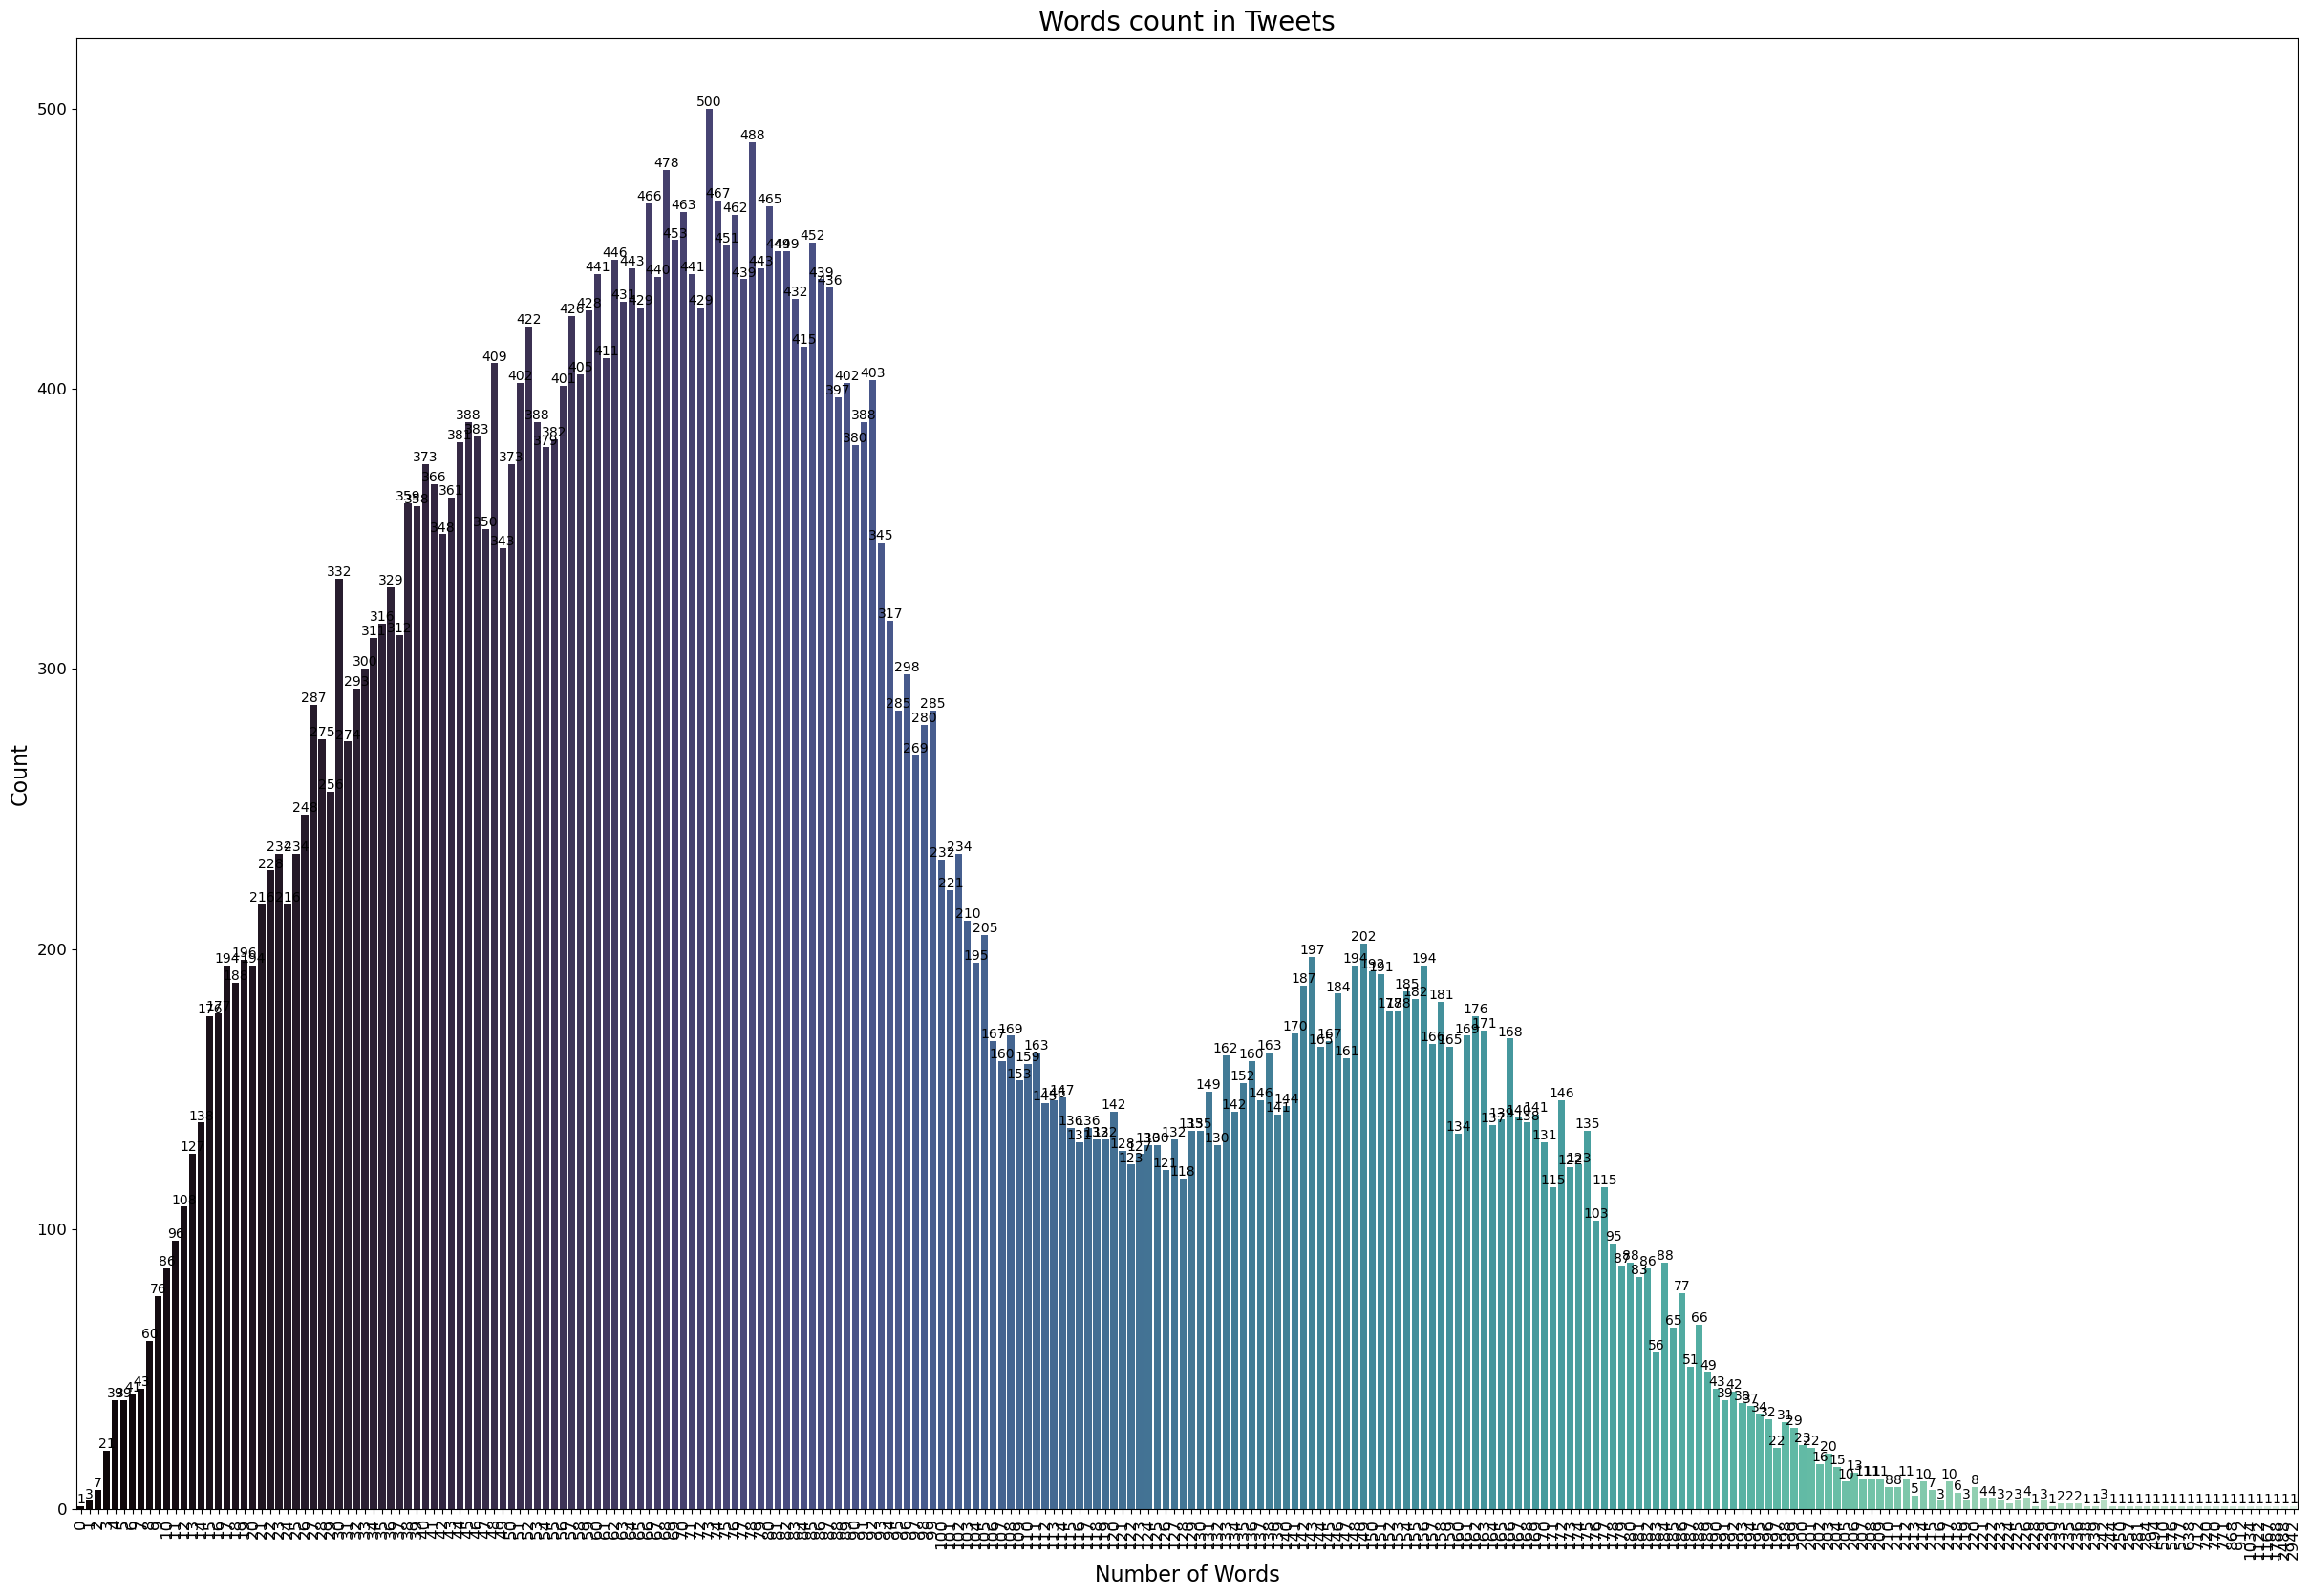

In [106]:

# Create a list to store the lengths of each tweet
tweet_lengths = []

# Loop through each tweet in the DataFrame
for tweet in df1['tweet_text']:
    
    # Calculate the length of the tweet and append it to the list
    tweet_len = len(tweet)
    tweet_lengths.append(tweet_len)
    
# Create a new column in the DataFrame with the tweet lengths
df1['text_len'] = tweet_lengths

# Plot the distribution of tweet lengths
plt.figure(figsize=(30,20))
ax = sns.countplot(x='text_len', data=df1, palette='mako')
plt.title('Words count in Tweets', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Number of Words', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

# Add labels to the bars in the plot
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()


### Sentiment Data Exploration

In [116]:
not_cyberbullying_type = df1[df1['cyberbullying_type']=='not_cyberbullying']
gender_type = df1[df1['cyberbullying_type']=='gender']
religion_type = df1[df1['cyberbullying_type']=='religion']
other_cyberbullying_type = df1[df1['cyberbullying_type']=='other_cyberbullying']
age_type = df1[df1['cyberbullying_type']=='age']
ethnicity_type = df1[df1['cyberbullying_type']=='ethnicity']


### EDA

#### Online bullying based on religion



